******************************
TITANIC DATASET OVERVIEW
******************************
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   Na

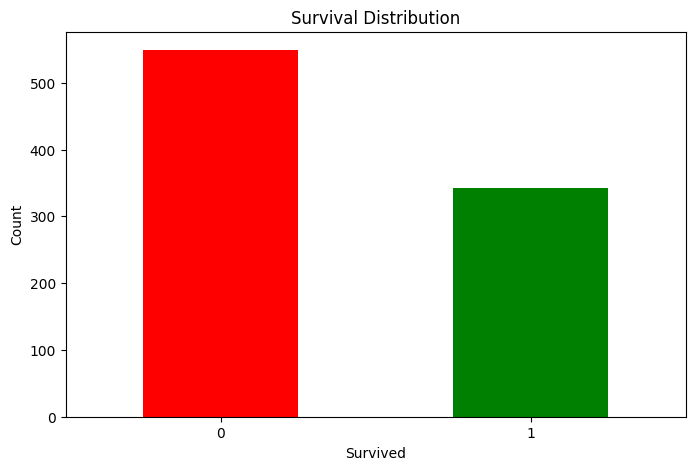

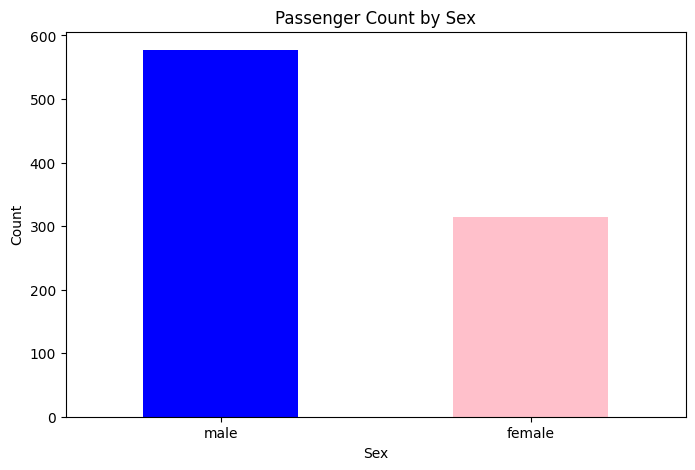

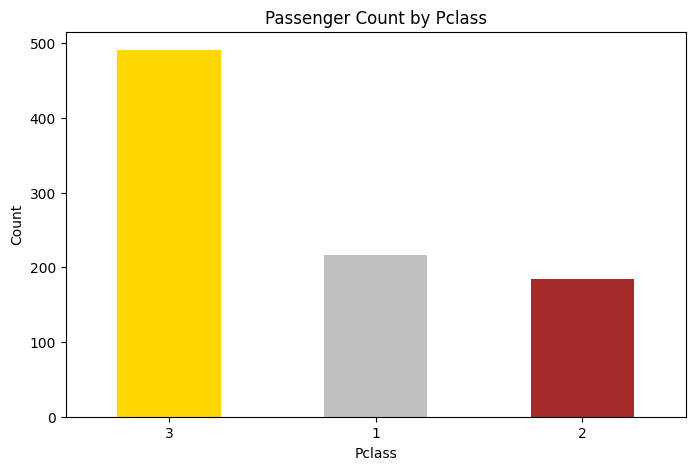

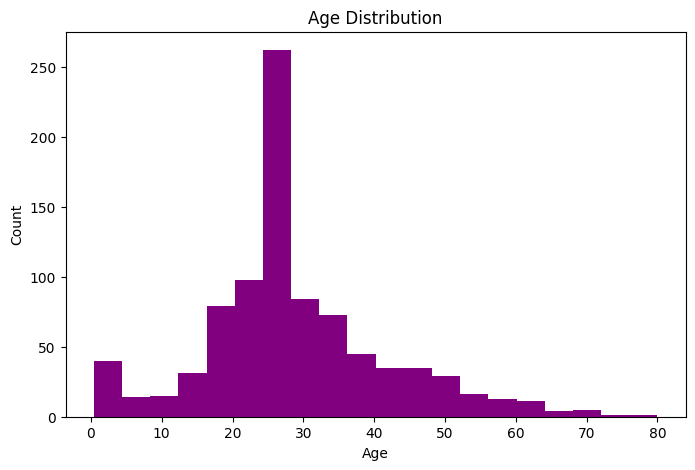

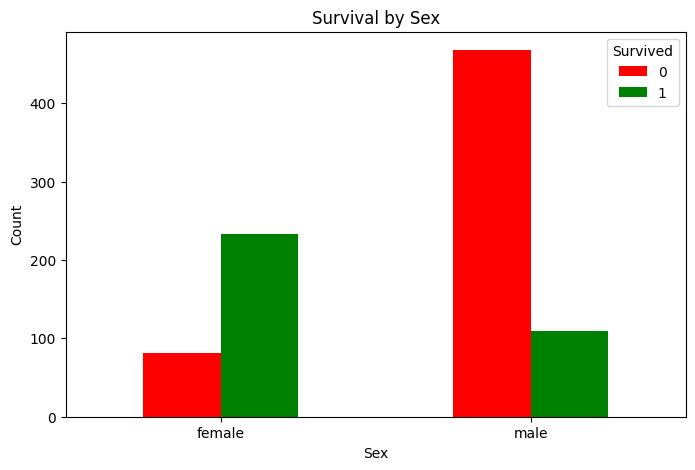

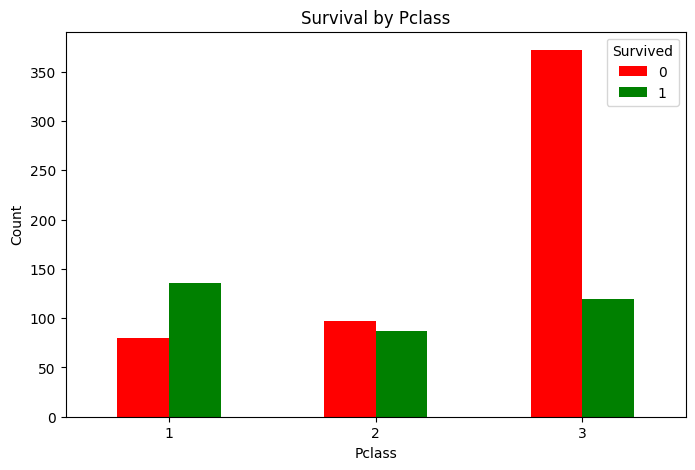

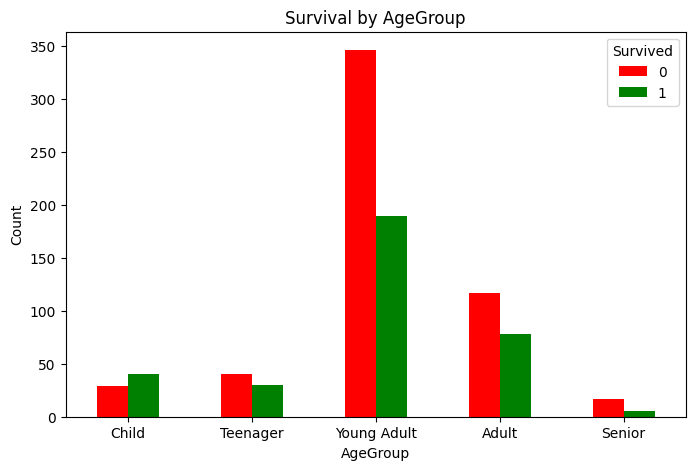

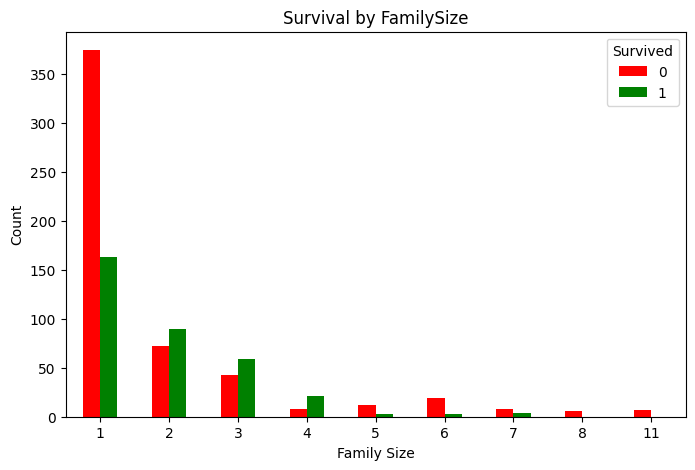

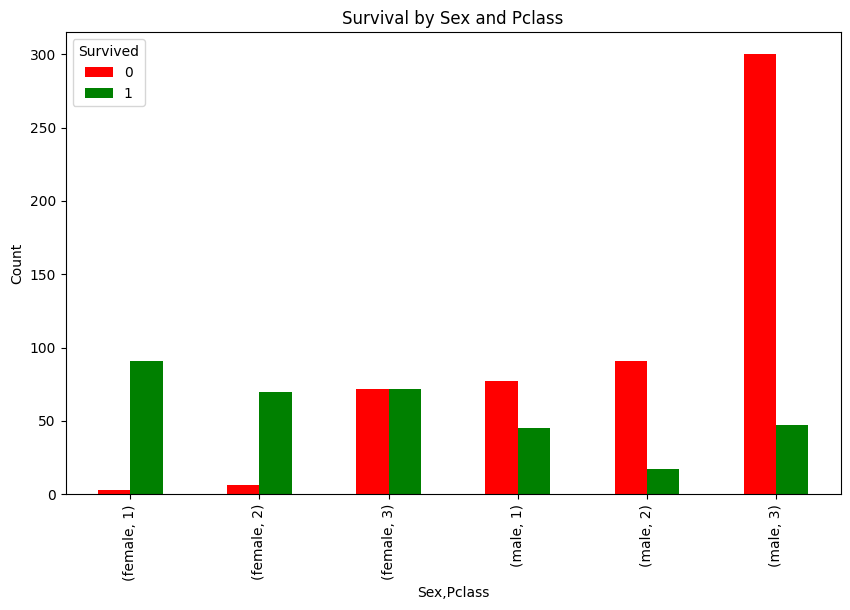

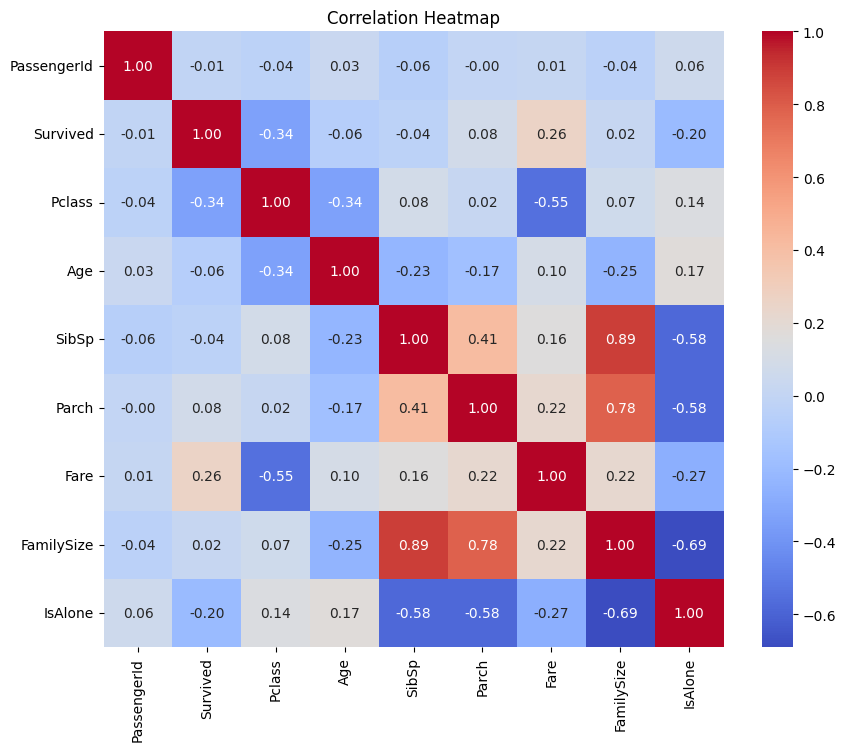

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df = pd.read_csv('Titanic-Dataset.csv')
print('*' * 30)
print('TITANIC DATASET OVERVIEW')
print('*' * 30)
print(df.head(5))

print('*' * 30)
print('DATASET SHAPE')
print('*' * 30)
print(df.shape)

print('*' * 30)
print('MISSING VALUES IN DATASET')
print('*' * 30)
print(df.isnull().sum())
# 177 missing Age values
# 687 missing Cabin values
# 2 missing Embarked values



df.drop('Cabin',axis=1,inplace=True) # Dropping Cabin due to high number of missing values
df['Age'] = df['Age'].fillna(df['Age'].median()) # Filling missing Age values with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])# Filling missing Embarked values with mode

print('\nmissing values after cleaning')
print(df.isnull().sum())

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
print('\nFamilySize feature added')
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100],labels=['Child','Teenager','Young Adult','Adult','Senior'])
print('\nAgeGroup feature added')

df['IsAlone'] = (df['FamilySize']==1).astype(int)
print('\nIsAlone feature added')

print('*' * 30)
print('Total Passengers:', len(df))
print('Total Survivors:', df['Survived'].sum())
print('Survival Rate:{:.2f}%'.format(df['Survived'].mean()*100))
print('Total Deaths:',len(df)-df['Survived'].sum())
print('Death Rate:{:.2f}%'.format((1 - df['Survived'].mean())*100))

print('*' * 30)
print('Survival by Sex')
print('*' *30)
print(pd.crosstab(df['Sex'],df['Survived']))


print('*' * 30)
print('Survival by Pclass')
print('*' *30)
print(pd.crosstab(df['Pclass'],df['Survived']))

print('*' * 30)
print('Survival by AgeGroup')
print('*' *30)
print(pd.crosstab(df['AgeGroup'],df['Survived']))

print('*' * 30)
print('Survival by FamilySize')
print('*' *30)
print(pd.crosstab(df['FamilySize'],df['Survived']))

print('*' * 30)
print('Average Age by Survival')
print('*' *30)
print(df.groupby('Survived')['Age'].mean())


print('*' * 30)
print('Average Fare by Survival')
print('*' *30)
print(df.groupby('Survived')['Fare'].mean())


print('*' * 30)
print('Survival by Sex and Pclass')
print('*' *30)
print(pd.crosstab([df['Sex'],df['Pclass']],df['Survived']))



print('*' * 30)
print('Visualizations')
print('*' * 30)

plt.figure(figsize=(8,5))
df['Survived'].value_counts().plot(kind='bar',color =['red','green'])
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



plt.figure(figsize=(8,5))
df['Sex'].value_counts().plot(kind='bar',color=['blue','pink'])
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8,5))
df['Pclass'].value_counts().plot(kind='bar',color=['gold','silver','brown'])
plt.title('Passenger Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(8,5))
df['Age'].plot(kind='hist',bins=20, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar',figsize=(8,5),color=['red','green'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar',figsize=(8,5),color=['red','green'])
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
#According to the visualizations, pclass = 3 had the highest number of passengers but also the highest number of deaths, while pclass = 1 had the highest survival number.


pd.crosstab(df['AgeGroup'],df['Survived']).plot(kind='bar',figsize=(8,5),color=['red','green'])
plt.title('Survival by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
#According to the visualizations, young adults and adults had the highest number of passengers and deaths.



pd.crosstab(df['FamilySize'],df['Survived']).plot(kind='bar',figsize=(8,5),color=['red','green'])
plt.title('Survival by FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
#This graph shows that passengers who traveled alone had a higher death rate compared to those who traveled with family.


pd.crosstab([df['Sex'],df['Pclass']],df['Survived']).plot(kind='bar',figsize=(10,6),color=['red','green'])
plt.title('Survival by Sex and Pclass')
plt.ylabel('Count')
plt.show()

#This graph shows that poor man had the highest death rate, while rich men and women had the highest survival rates.

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()